# Баранов Арсений Юрьевич БФБО-05-23

## Теоретический материал – Метрики
Средняя квадратичная ошибка (англ. Mean Squared Error, MSE) – самая
популярная метрика, используемая для задач регрессии.
Средняя квадратичная ошибка:
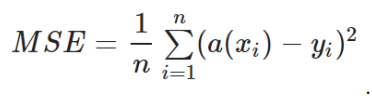
Средняя абсолютная ошибка (англ. Mean Absolute Error, MAE).
Средняя абсолютная ошибка:
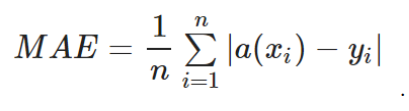

## Пример.
Задача:
Сгенерируйте искусственные данные. Каждый объект имеет один признак,
который записан в переменную 𝑋𝑋. Целевая переменная 𝑦𝑦 зависит от 𝑋𝑋 по
закону y=7X-10. Поскольку восстанавливать в точности линейную
зависимость не интересно, к целевой переменной необходимо добавить шум,
имеющий нормальное распределение. Обучите модель линейной регрессии
на тренировочной выборке и предскажите значения на тестовой. Вычислите
метрики MSE и MAE на тренировочной и тестовой выборках.

(array([1., 4., 1., 2., 4., 4., 1., 2., 0., 1.]),
 array([-15.16276189, -11.16499665,  -7.16723141,  -3.16946618,
          0.82829906,   4.8260643 ,   8.82382953,  12.82159477,
         16.81936001,  20.81712524,  24.81489048]),
 <BarContainer object of 10 artists>)

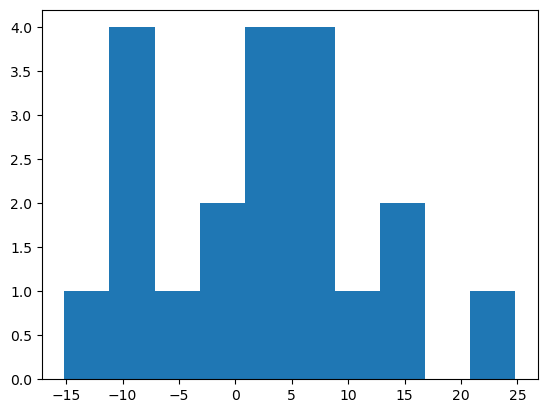

In [2]:
import numpy as np
import matplotlib.pyplot as plt
noise = np.random.randn(20) * 10
plt.hist(noise)

In [3]:
X = np.linspace(-5, 5, 20)
y = 10 * X - 7 + noise
X = X.reshape(-1,1)
X.shape

(20, 1)

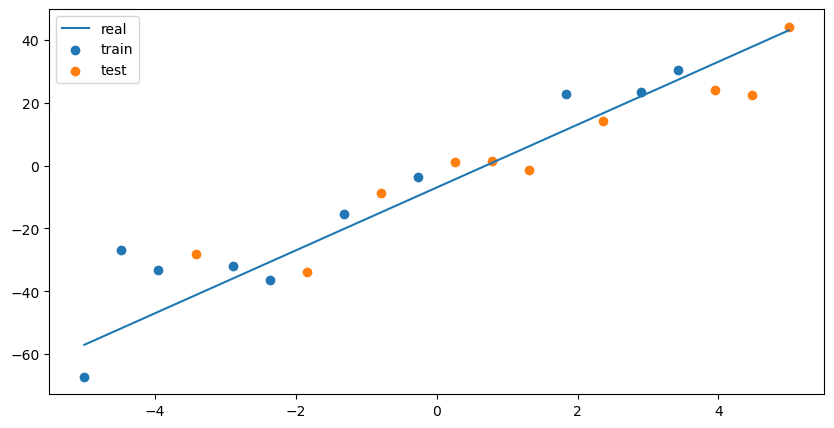

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
plt.figure(figsize=(10, 5))
plt.plot(X, 10 * X - 7, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model.fit(X_train, y_train)
predictions = model.predict(X_test)
w = model.coef_[0]
b = model.predict(np.zeros((1, 1)))[0]

In [6]:
w, b

(9.77599160670596, -1.9865814253154443)

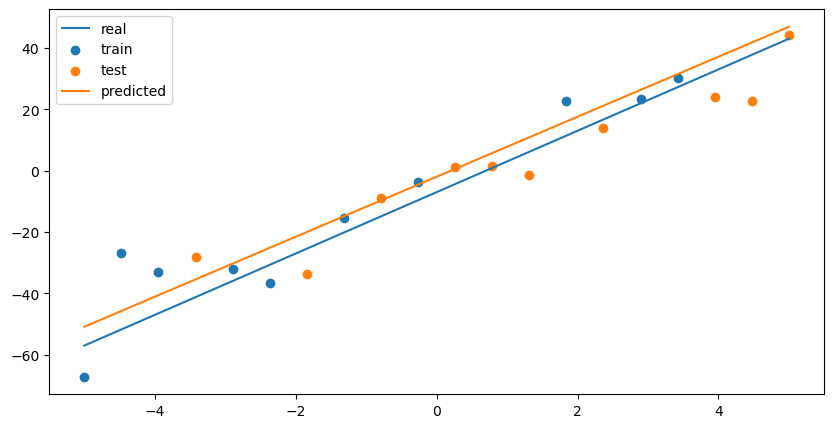

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(X, 10 * X - 7, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test') 
plt.plot(X, X * w + b, label='predicted')
plt.legend()
plt.show()

## Задание 1.
Задача:
Сгенерируйте самостоятельно начальные данные для линейной регрессии.
Произведите разделение данных на обучающую и тестовую выборку.
Обучите модель линейной регрессии на тренировочной выборке и
предскажите значения на тестовой. Вычислите метрики MSE и MAE на
тренировочной и тестовой выборках. Сделайте выводы. Верно ли, что
ошибка на обучающей выборке всегда меньше, чем на тестовой? 

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Генерация данных
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Признак (например, время учебы)
y = 2 * X + 1 + np.random.randn(100, 1) * 2  # Целевая переменная (например, оценка за экзамен)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание значений на обучающей и тестовой выборках
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Вычисление метрик MSE и MAE
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Вывод результатов
print(f'MSE на тренировочной выборке: {mse_train}')
print(f'MAE на тренировочной выборке: {mae_train}')
print(f'MSE на тестовой выборке: {mse_test}')
print(f'MAE на тестовой выборке: {mae_test}')

MSE на тренировочной выборке: 3.390715425683882
MAE на тренировочной выборке: 1.4694595853839043
MSE на тестовой выборке: 2.614798054868008
MAE на тестовой выборке: 1.1826851558379559


## Задание 2.
Приведите примеры постановки прикладных задач регрессионного анализа.
В ответе привести примеры постановок трех задач, где применимы
алгоритмы регрессии.

### Прогнозирование цен на недвижимость:
Задача: Предсказать стоимость недвижимости (например, цену дома) на основе различных факторов, таких как площадь, количество комнат, расположение и другие характеристики.
Применение регрессии: Линейная регрессия или другие регрессионные модели могут быть использованы для построения модели, предсказывающей цену дома на основе характеристик.
### Оценка влияния рекламы на продажи:

Задача: Определить, как объем рекламы (например, сумма денег, потраченная на рекламу) влияет на объем продаж товара.
Применение регрессии: Можно использовать линейную регрессию, чтобы оценить коэффициенты и выявить, насколько изменения в рекламных расходах связаны с изменениями в объеме продаж.
### Прогнозирование выручки в интернет-магазине:

Задача: Предсказать будущую выручку интернет-магазина на основе различных факторов, таких как количество посетителей, конверсия, средний чек и другие метрики.
Применение регрессии: Регрессионные модели могут использоваться для построения прогностической модели, которая учитывает влияние различных факторов на выручку интернет-магазина.

## Задание 3*.
Приведите постановку прикладной задачи регрессионного анализа.
Создайте или скачайте (готовый датасет из открытых источников) массив
данных. Обучите модель линейной регрессии на тренировочной выборке и
предскажите значения на тестовой. Вычислите метрики MSE и MAE на
тренировочной и тестовой выборках. Сделайте выводы. Если Вы смогли
сформулировать постановку своей задачи и решить ее, то мы ждем Вас на
кафедральных конференциях. 

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

url = "titanic.csv"
data = pd.read_csv(url)

# Prepare data
data = data.dropna(subset=['Sex', 'Pclass', "Survived", "Age", "SibSp", "Parch"]) # Удаляю строки с NaN
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
X = data[['Sex', 'Pclass', "Age", "SibSp", "Parch"]] # Входные данные
y = data["Survived"] # Ответы

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#Линейная регр.
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание значений
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Вывод результатов
print(f'MSE на тренировочной выборке: {mse_train}')
print(f'MAE на тренировочной выборке: {mae_train}')
print(f'MSE на тестовой выборке: {mse_test}')
print(f'MAE на тестовой выборке: {mae_test}')

MSE на тренировочной выборке: 0.14296833982299378
MAE на тренировочной выборке: 0.29370918829215864
MSE на тестовой выборке: 0.15346815941881856
MAE на тестовой выборке: 0.29452870054090186


In [10]:
# Создание новых данных для предсказания
new_data = pd.DataFrame({'Sex': [0], 'Pclass': [1], 'Age': [10], 'SibSp': [0], 'Parch': [0]})

# Предсказание с использованием обученной модели
prediction = model.predict(new_data)

# Вывод результата
print(f'Шанс выживания: {round(float(prediction[0]), 2) * 100}%')

Шанс выживания: 63.0%


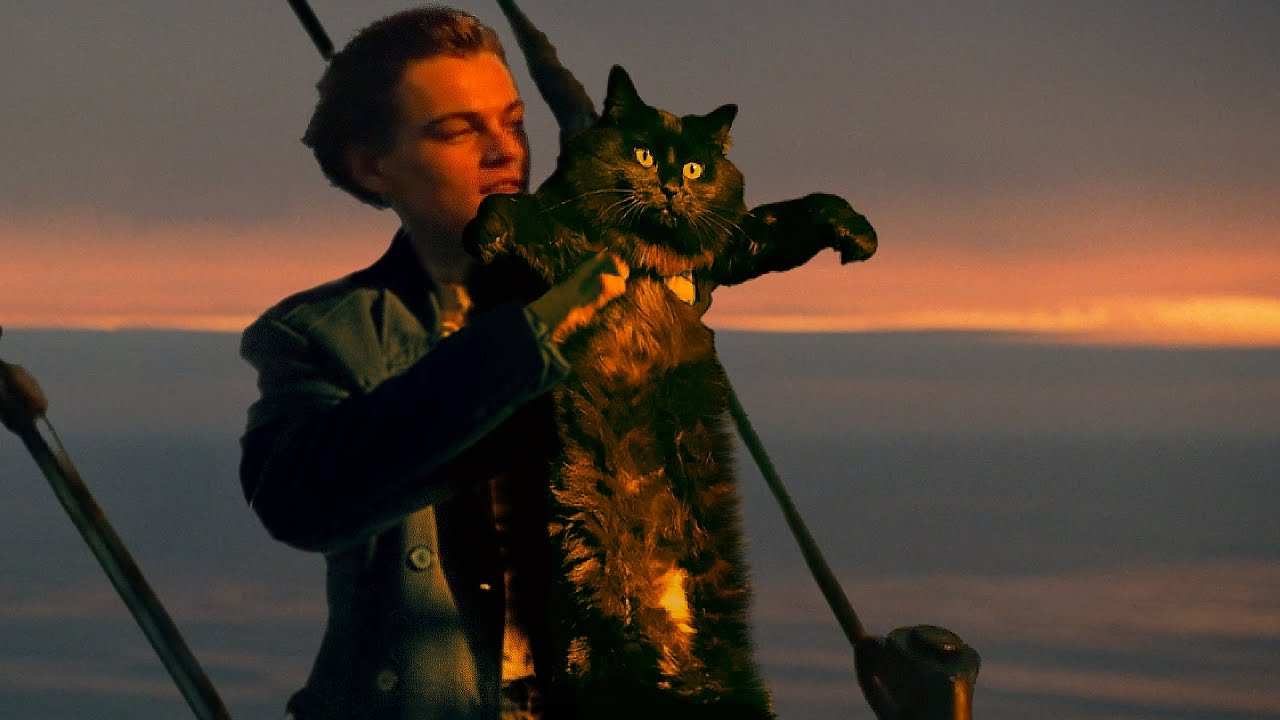